# **Milestone 2**
---

# **1 - Perkenalan**

Nama        : Ade Widya Ningrum  

Batch       : RMT-047  

### **Background :**     
Penyakit jantung merupakan salah satu penyebab utama kematian di seluruh dunia. Deteksi dini terhadap kemungkinan seseorang memiliki penyakit jantung menjadi tantangan besar karena banyak kasus baru terdiagnosis ketika sudah memasuki tahap serius. Oleh karena itu, diperlukan pendekatan prediktif yang dapat membantu mengidentifikasi individu dengan kemungkinan tinggi sejak awal. Dengan adanya prediksi ini, intervensi medis maupun perubahan gaya hidup dapat dilakukan lebih cepat untuk mencegah kondisi semakin parah dan meningkatkan kualitas hidup pasien.

Dengan memanfaatkan data survei kesehatan populasi seperti Behavioral Risk Factor Surveillance System (BRFSS), faktor-faktor gaya hidup dan kondisi kesehatan dapat dianalisis untuk memprediksi kemungkinan seseorang memiliki penyakit jantung, sekaligus memberikan insight mengenai faktor-faktor yang meningkatkan risiko penyakit jantung.

### **Problem Statement :**  
Project ini bertujuan untuk memprediksi kemungkinan seseorang memiliki penyakit jantung menggunakan data BRFSS. Hasil prediksi diharapkan dapat membantu mengidentifikasi individu dengan kemungkinan tinggi, sehingga langkah pencegahan dan intervensi dapat dilakukan lebih tepat.
Project ini akan dibuat dengan menggunakan :
- Algoritma : Random Forest
- Metrics : Recall



### **Objective :**
Membangun dan mengevaluasi model Machine Learning berbasis klasifikasi untuk:
- Memprediksi kemungkinan seseorang memiliki penyakit jantung berdasarkan faktor gaya hidup dan kondisi kesehatan.  
- Memberikan insight mengenai faktor-faktor yang meningkatkan risiko penyakit jantung.  
- Mendukung upaya pencegahan penyakit jantung di masyarakat melalui identifikasi individu dengan kemungkinan tinggi.




# **2 - Import Libraries**

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation
import phik

# Outlier Handling
from feature_engine.outliers import Winsorizer

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTENC

# Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # type: ignore

# Cross Validation
from sklearn.model_selection import StratifiedKFold,cross_validate

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Model Evaluation
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

# Model saving
import pickle

# **3 - Data Loading**

## Deskripsi Dataset :
Link Dataset    : https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

Jumlah Kolom    : 19 kolom  

Jumlah Baris    : 308.854 baris  

Deskripsi Kolom :  
| Kolom                        | Deskripsi                                                                 |
|------------------------------|---------------------------------------------------------------------------|
| General_Health               | Kondisi kesehatan umum yang dilaporkan responden                          |
| Checkup                      | Waktu terakhir responden melakukan pemeriksaan rutin ke dokter            |
| Exercise                     | Aktivitas fisik atau olahraga yang dilakukan responden dalam 1 bulan terakhir |
| Skin_Cancer                  | Responden yang melaporkan memiliki kanker kulit                           |
| Other_Cancer                 | Responden yang melaporkan memiliki jenis kanker lainnya                   |
| Depression                   | Responden yang melaporkan memiliki gangguan depresi                       |
| Diabetes                     | Responden yang melaporkan memiliki diabetes (termasuk jenis diabetes)     |
| Arthritis                    | Responden yang melaporkan memiliki artritis                               |
| Sex                          | Jenis kelamin responden                                                   |
| Age_Category                 | Kelompok usia responden                                                   |
| Height_(cm)                  | Tinggi badan responden dalam sentimeter                                   |
| Weight_(kg)                  | Berat badan responden dalam kilogram                                      |
| BMI                          | Indeks Massa Tubuh (IMT) hasil perhitungan dari tinggi dan berat badan    |
| Smoking_History              | Riwayat perilaku merokok responden                                        |
| Alcohol_Consumption          | Frekuensi konsumsi alkohol responden                                      |
| Fruit_Consumption            | Frekuensi konsumsi buah responden                                         |
| Green_Vegetables_Consumption | Frekuensi konsumsi sayuran hijau responden                                |
| FriedPotato_Consumption      | Frekuensi konsumsi kentang goreng responden                               |
| Heart_Disease                | Responden yang melaporkan memiliki penyakit jantung koroner atau serangan jantung |


## Load Data

In [2]:
# Load dataset dari file csv

df = pd.read_csv('Heart-Disease- dataset.csv')
df

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,No
1,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,Yes
2,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,No
3,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,Yes
4,Good,Within the past year,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0,No
308850,Fair,Within the past 5 years,Yes,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0,No
308851,Very Good,5 or more years ago,Yes,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0,No
308852,Very Good,Within the past year,Yes,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0,No


## Informasi Dataset

In [3]:
# Cek info dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Skin_Cancer                   308854 non-null  object 
 4   Other_Cancer                  308854 non-null  object 
 5   Depression                    308854 non-null  object 
 6   Diabetes                      308854 non-null  object 
 7   Arthritis                     308854 non-null  object 
 8   Sex                           308854 non-null  object 
 9   Age_Category                  308854 non-null  object 
 10  Height_(cm)                   308854 non-null  float64
 11  Weight_(kg)                   308854 non-null  float64
 12  BMI                           308854 non-nul

*Informasi :*  
- Dataset terdiri dari 19 kolom dan 308.854 baris
- 7 kolom bertipe data float dan 12 kolom bertipe data object

## Cek Duplikat

In [4]:
# Cek data duplikat

df.duplicated().sum()

np.int64(80)

*Informasi :*
- Terdapat 80 data duplikat

*Next Action :*
- Akan dilakukan drop untuk data duplikat

In [5]:
# Drop data duplikat

df = df.drop_duplicates()

# Cek ulang data duplikat

df.duplicated().sum()

np.int64(0)

*Data duplikat telah berhasil dihapus*

## Cek Missing Value

In [6]:
# Cek missing value

df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
Heart_Disease                   0
dtype: int64

*Informasi :*
- Tidak terdapat missing value pada dataset

## Pengecekan Dataset

In [7]:
# Summary check untuk numerikal kolom

df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000
mean,170.615220,83.590399,28.626813,5.097557,29.834290,15.109517,6.297237
std,10.658452,21.344664,6.522810,8.200434,24.877812,14.926912,8.583837
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


*Informasi :*
- Pada setiap kolom terdapat outlier yang cukup besar, dapat dilihat nilai pada `max` jauh lebih besar dibandingkan nilai `mean` dan `median`.
- Nilai mean dan median dari setiap kolom numerikal hampir sama yang menunjukkan sebagian besar distribusi data relatif normal/simetris, kecuali pada kolom `Alcohol_Consumption` yang sangat skewed (mean jauh lebih tinggi daripada median).

In [8]:
# Sumaary check untuk kategorikal kolom

df.describe(include='O').T # type: ignore

,count,unique,top,freq
General_Health,308774,5,Very Good,110351
Checkup,308774,5,Within the past year,239295
Exercise,308774,2,Yes,239305
Skin_Cancer,308774,2,No,278782
Other_Cancer,308774,2,No,278897
Depression,308774,2,No,246875
Diabetes,308774,4,No,259062
Arthritis,308774,2,No,207711
Sex,308774,2,Female,160155
Age_Category,308774,13,65-69,33425


*Informasi :*
- Hampir semua fitur kategorikal menunjukkan dominasi jawaban "No" atau kategori sehat, misalnya pada `Heart_Disease`, `Skin_Cancer`, `Other_Cancer`, `Depression`, `Diabetes` dan `Arthritis`.
- Kondisi data imbalance terlihat jelas pada variabel target `Heart_Disease`, karena hanya sebagian kecil responden yang melaporkan memiliki penyakit jantung.
- Terdapat keseimbangan antara gender laki-laki dan perempuan, meskipun jumlah perempuan lebih besar.

# **4 - Exploratory Data Analysis (EDA)**

### **(1) Pengaruh Aktivitas Olahraga terhadap Penyakit Jantung (Heart Disease)**

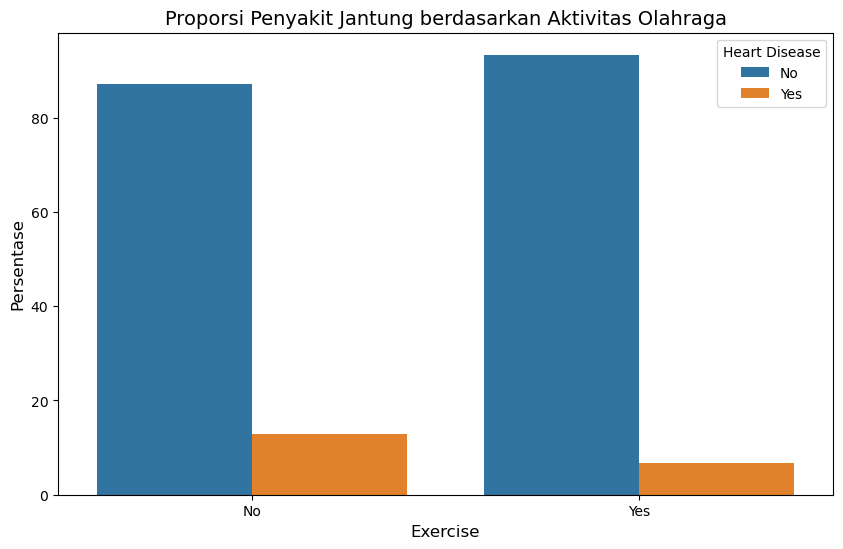

In [9]:
# Membuat crosstab Exercise vs Heart Disease
exercise_heart = pd.crosstab(df['Exercise'], df['Heart_Disease'], normalize='index') * 100

# Plot
plt.figure(figsize=(10,6))

sns.barplot(
    data=exercise_heart.reset_index().melt(id_vars='Exercise'),
    x='Exercise', y='value', hue='Heart_Disease'
)

plt.title('Proporsi Penyakit Jantung berdasarkan Aktivitas Olahraga', fontsize=14)
plt.ylabel('Persentase', fontsize=12)
plt.xlabel('Exercise', fontsize=12)
plt.legend(title='Heart Disease')
plt.show()


*Informasi :*
- Orang yang berolahraga cenderung memiliki risiko penyakit jantung lebih rendah.

- Persentase orang dengan penyakit jantung lebih kecil di kelompok yang olahraga (<10%) dibandingkan yang tidak olahraga (>10%).

- Sebagian besar responden, tidak memiliki penyakit jantung.

### **(2) Pengaruh Penyakit Lain (Skin Cancer, Depression, Diabetes) terhadap Penyakit Jantung (Heart Disease)**

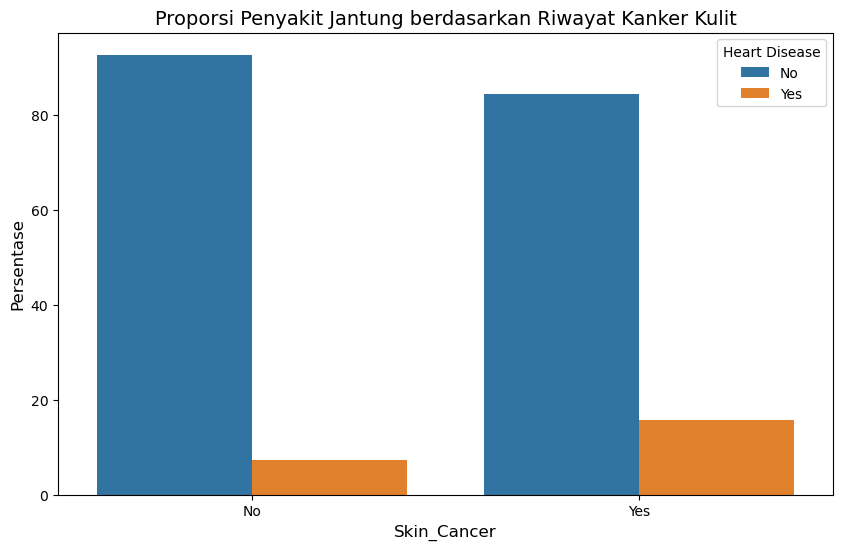

In [10]:
# Membuat crosstab Skin Cancer vs Heart Disease
skin_heart = pd.crosstab(df['Skin_Cancer'], df['Heart_Disease'], normalize='index') * 100
skin_heart = skin_heart.reset_index().melt(id_vars='Skin_Cancer')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=skin_heart, x='Skin_Cancer', y='value', hue='Heart_Disease')
plt.title('Proporsi Penyakit Jantung berdasarkan Riwayat Kanker Kulit', fontsize=14)
plt.ylabel('Persentase', fontsize=12)
plt.xlabel('Skin_Cancer', fontsize=12)
plt.legend(title='Heart Disease')
plt.show()


*Informasi :*
- Persentase penyakit jantung lebih tinggi pada orang yang memiliki riwayat kanker kulit dibanding yang tidak.

- Adanya kemungkinan hubungan positif antara riwayat Skin Cancer dan risiko Heart Disease.

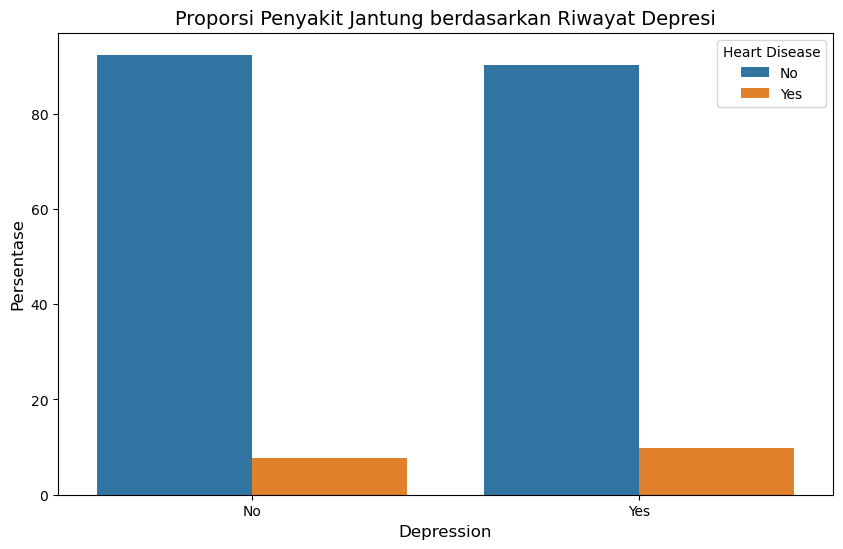

In [11]:
# Membuat crosstab Depression vs Heart Disease
depression = pd.crosstab(df['Depression'], df['Heart_Disease'], normalize='index') * 100
depression = depression.reset_index().melt(id_vars='Depression')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=depression, x='Depression', y='value', hue='Heart_Disease')
plt.title('Proporsi Penyakit Jantung berdasarkan Riwayat Depresi', fontsize=14)
plt.ylabel('Persentase', fontsize=12)
plt.xlabel('Depression', fontsize=12)
plt.legend(title='Heart Disease')
plt.show()

*Informasi :*
- Persentase penyakit jantung tidak jauh berbeda antara orang yang pernah memiliki riwayat depresi ataupun tidak. Tetapi, orang yang pernah memiliki riwayat depresi, memiliki kemungkinan sedikit lebih tinggi dibandingkan yang tidak.

- Adanya kemungkinan bahwa depresi tidak meningkatkan kemungkinan penyakit jantung.

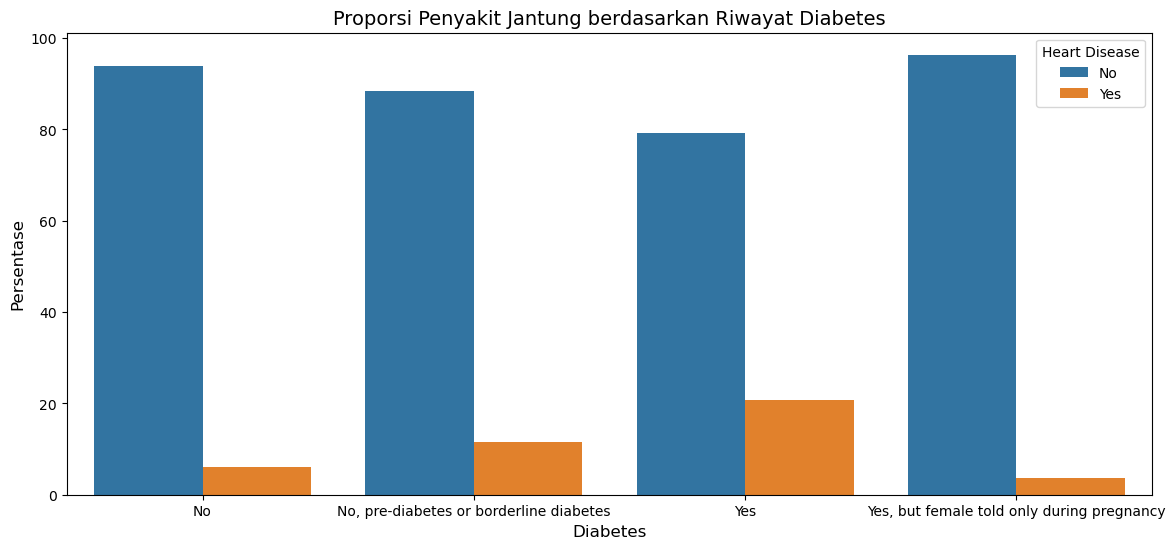

In [12]:
# Membuat crosstab Diabetes vs Heart Disease
diabetes = pd.crosstab(df['Diabetes'], df['Heart_Disease'], normalize='index') * 100
diabetes = diabetes.reset_index().melt(id_vars='Diabetes')

# Plot
plt.figure(figsize=(14,6))
sns.barplot(data=diabetes, x='Diabetes', y='value', hue='Heart_Disease')
plt.title('Proporsi Penyakit Jantung berdasarkan Riwayat Diabetes', fontsize=14)
plt.ylabel('Persentase', fontsize=12)
plt.xlabel('Diabetes', fontsize=12)
plt.legend(title='Heart Disease')
plt.show()

*Informasi :*
- Kelompok orang dengan riwayat diabetes memiliki kemungkinan penyakit jantung tertinggi (>20%)
- Orang dengan pre-diabetes memiliki kemungkinan penyakit jantung lebih tinggi dibandingkan mereka tanpa riwayat diabetes, meski tidak setinggi orang dengan diabetes penuh.
- Ibu hamil dengan diabetes selama kehamilan memiliki kemungkinan penyakit jantung terendah dibandingkan kelompok lain.
- Terdapat korelasi positif antara diabetes dan penyakit jantung: orang dengan riwayat diabetes cenderung memiliki kemungkinan penyakit jantung lebih tinggi.

### **(3) Distribusi Penyakit Jantung (Heart Disease) Berdasarkan Sex dan Age**

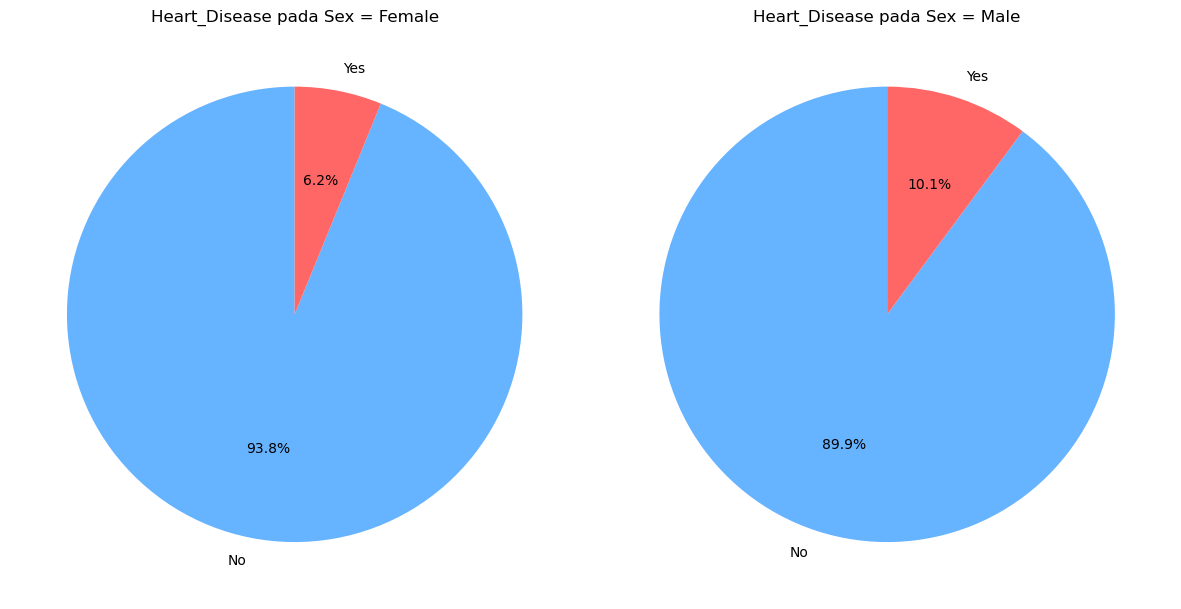

In [13]:
# Hitung jumlah Heart_Disease per Sex
sex_counts = df.groupby('Sex')['Heart_Disease'].value_counts().unstack().fillna(0)

# Buat figure dengan 1 baris, 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(12,6))

colors = ['#66b3ff','#ff6666']
labels = ['No', 'Yes']

for ax, sex in zip(axes, sex_counts.index):
    ax.pie(sex_counts.loc[sex], 
           labels=labels, 
           autopct='%1.1f%%', 
           startangle=90, 
           colors=colors)
    ax.set_title(f'Heart_Disease pada Sex = {sex}')

plt.tight_layout()
plt.show()

*Informasi :*
- Persentase pria yang memiliki penyakit jantung lebih tinggi dibandingkan wanita.
- Hal ini menunjukkan adanya korelasi positif antara jenis kelamin laki-laki dan kemungkinan penyakit jantung.

/var/folders/_p/tz0d3gfs0gn4vr1kpxq_tq840000gn/T/ipykernel_52376/3563773296.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts_sorted.values, y=age_counts_sorted.index, palette="Reds_r")


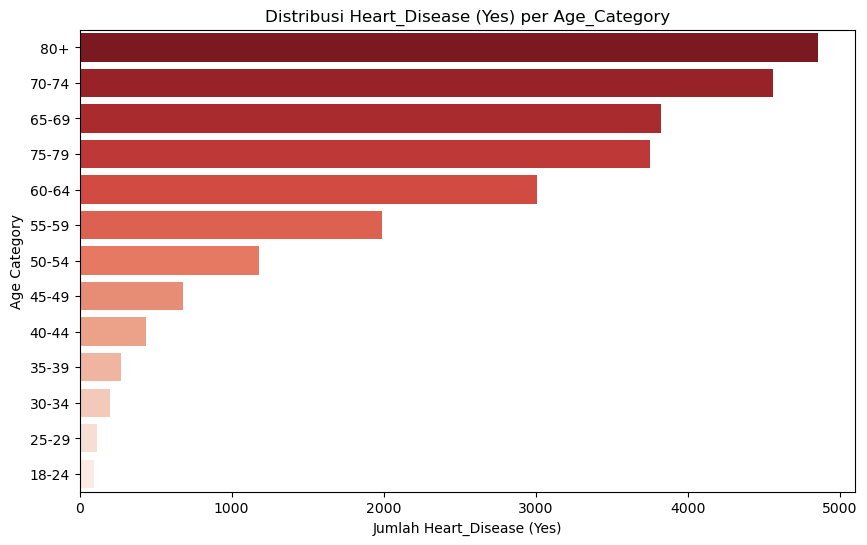

In [14]:
# Hitung jumlah Heart_Disease per Age Category
age_counts = df.groupby('Age_Category')['Heart_Disease'].value_counts().unstack().fillna(0)

# Ambil hanya yang "Yes" (mengidap penyakit jantung)
age_counts_yes = age_counts['Yes']

# Urutkan dari yang paling banyak
age_counts_sorted = age_counts_yes.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=age_counts_sorted.values, y=age_counts_sorted.index, palette="Reds_r")
plt.xlabel("Jumlah Heart_Disease (Yes)")
plt.ylabel("Age Category")
plt.title("Distribusi Heart_Disease (Yes) per Age_Category")
plt.show()


*Informasi :*
- Persentase penyakit jantung paling tinggi terdapat pada kelompok dengan usia 80 tahun keatas
- Persentase penyakit jantung paling rendah terdapat pada kelompok dengan rentang usia 18-24 tahun
- Dari data terlihat adanya tren positif antara usia dan kemungkinan penyakit jantung, artinya semakin tua usia seseorang, semakin tinggi kemungkinan untuk memiliki penyakit jantung.

### **(4) Pengaruh Riwayat Merokok terhadap Penyakit Jantung (Heart Disease)**

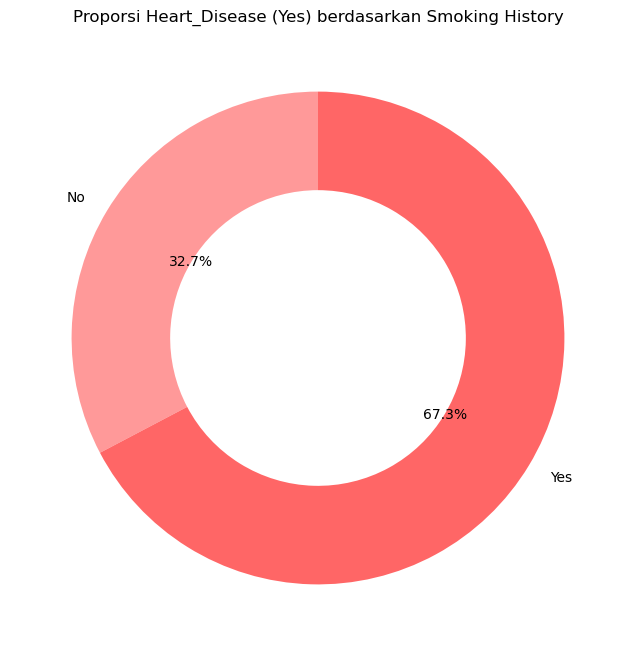

In [15]:
# Hitung proporsi Heart_Disease Yes per kategori Smoking_History
smoke_prop = df.groupby('Smoking_History')['Heart_Disease'].value_counts(normalize=True).unstack().fillna(0)
smoke_yes = smoke_prop['Yes']

# Donut chart
plt.figure(figsize=(8,8))
plt.pie(smoke_yes, 
        labels=smoke_yes.index,  # type: ignore
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Reds_r.colors if hasattr(plt.cm.Reds_r, 'colors') else ['#ff9999','#ff6666','#ff3333','#cc0000'],  # type: ignore
        wedgeprops=dict(width=0.4)) 
plt.title('Proporsi Heart_Disease (Yes) berdasarkan Smoking History')
plt.show()


*Informasi :*
- Persentase penyakit jantung pada orang yang merokok adalah 67.3%
- Persentase penyakit jantung pada orang yang tidak merokok adalah 32,7%
- Dari data terlihat adanya tren positif antara riwayat merokok dan kemungkinan penyakit jantung, artinya merokok meningkatkan kemungkinan seseorang akan terkena penyakit jantung.

# **5 - Feature Engineering**

## Split Between X(Feature) and y(Target)

In [16]:
# Mengambil semua kolom kecuali Heart_Desease sebagai feature
X = df.drop(['Heart_Disease'], axis=1)

# Mengambil hanya kolom Heart_Desease sebagai target
y = df['Heart_Disease']

X

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


## Split Between Numerical & Categorial Columns

In [17]:
# Menyimpan kolom yang bersifat numerical
num_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI','Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption' ]


# Menyimpan kolom yang bersifat categorical
cat_cols = [ 'Exercise', 'Age_Category', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex','Smoking_History' ]

# Menyimpan kolom yang bersifat ordinal
ord_cols = ['General_Health', 'Checkup']

## Cardinality Handling

In [18]:
# Mengecek jumlah nilai unik pada kolom kategorikal
for i in cat_cols:
  print(f'Number of categories in the variable {i} : {df[i].nunique()}')

Number of categories in the variable Exercise : 2
Number of categories in the variable Age_Category : 13
Number of categories in the variable Skin_Cancer : 2
Number of categories in the variable Other_Cancer : 2
Number of categories in the variable Depression : 2
Number of categories in the variable Diabetes : 4
Number of categories in the variable Arthritis : 2
Number of categories in the variable Sex : 2
Number of categories in the variable Smoking_History : 2


*Informasi :*
- Sebagian besar kolom memiliki cardinality yang rendah
- Cardinality pada kolom `Age_Category` termasuk tinggi jadi akan dilakukan reduce cardinality.

*Next Action :*
- Kolom `Age_Category` akan dilakukan reduce cardinality dengan cara membuat rentang umur yang lebih besar sehingga mengurangi nilai unik pada kolom tersebut.

In [19]:
X['Age_Category'].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [20]:
# Membuat fungsi untuk kategori umur yang baru
def group_age(age):
    if age in['18-24','25-29','30-34','35-39']:
        return '18-39'
    elif age in ['40-44','45-49','50-54','55-59']:
        return '40-59'
    elif age in ['60-64','65-69','70-74','75-79']:
        return '60-79'
    else:
        return '80+'

X['Age_Group'] = X['Age_Category'].apply(group_age)
X

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_Group
0,Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,60-79
1,Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,60-79
2,Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,60-79
3,Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,60-79
4,Good,Within the past year,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,80+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0,18-39
308850,Fair,Within the past 5 years,Yes,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0,60-79
308851,Very Good,5 or more years ago,Yes,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0,18-39
308852,Very Good,Within the past year,Yes,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0,60-79


*Reduce cardinality berhasil dilakukan*

## Split Between Train-set and Test-set

In [21]:
# Splitting between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Menampilkan dimensi data
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (247019, 19)
Test Size :  (61755, 19)


*Informasi :*
- Kolom train sebanyak 247.019 baris (80%) dan 19 kolom
- Kolom train sebanyak 61.755 baris (20%) dan 19 kolom

## Handle Missing Value

In [22]:
X_train.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
Age_Group                       0
dtype: int64

In [23]:
X_test.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
Age_Group                       0
dtype: int64

In [24]:
y_train.isnull().sum()

np.int64(0)

In [25]:
y_test.isnull().sum()

np.int64(0)

*Tidak terdapar missing value pada dataset*

## Handle Outlier

### Cek Nilai Skewness

In [26]:
# Mengecek nilai skewness pada kolom numerical
def check_skewness(df, *column_names):
    return {col: df[col].skew() for col in column_names if col in df.columns}

skewness_results = check_skewness(X_train, 'Height_(cm)', 'Weight_(kg)', 'BMI','Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption', 'FriedPotato_Consumption')

# Print hasil skewness
for col, skewness in skewness_results.items():
    print(f"{col}: {skewness}")

Height_(cm): 0.01715681567352799
Weight_(kg): 1.0560559790205701
BMI: 1.3790378417494478
Alcohol_Consumption: 1.8872615685493122
Fruit_Consumption: 1.249310833004649
Green_Vegetables_Consumption: 2.4155630107639463
FriedPotato_Consumption: 4.925663356365846


### Kategori Skewness

In [27]:
# Untuk menampung kategori skewness
normal_columns = []
skewed_columns = []
extreme_skewed_columns = []

# Looping nilai skewness dan kategorinya
for col, skewness in skewness_results.items():
    if skewness < -1.0 or skewness > 1.0:
        extreme_skewed_columns.append(col)
    elif abs(skewness) <= 0.5: 
        normal_columns.append(col)
    else:
        skewed_columns.append(col)

# Print hasil kategori skewness
print(f"Normal: {normal_columns}\nSkewed: {skewed_columns}\nExtreme Skewed: {extreme_skewed_columns}")

Normal: ['Height_(cm)']
Skewed: []
Extreme Skewed: ['Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


*Informasi :*
- Skewness pada kolom `Height_(cm)` mendekati normal
- Kolom lain merupakan postiviley skewed (distribusi miring ke kanan) terutama pada kolom `FriedPotato_Consumption` dengan nilai skewness tertinggi.


### Cek Persentase Outlier dengan Metode IQR

In [28]:
# Membuat fungsi untuk menghitung persentase outlier
def outlier_percentage(df, cols):
    result = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        total = len(df[col])
        percentage = (outliers / total) * 100
        result[col] = percentage
    return result

outlier_percent = outlier_percentage(X_train, num_cols)
outlier_df = pd.DataFrame([outlier_percent])

# Tampilkan tabel
print(outlier_df)


   Height_(cm)  Weight_(kg)       BMI  Alcohol_Consumption  Fruit_Consumption  \
0     0.336411     2.361357  3.062922            11.679264          22.069962   

   Green_Vegetables_Consumption  FriedPotato_Consumption  
0                      3.838166                 6.303159  


*Informasi :*
- Terdapat outlier pada setiap kolom dengan rentang 0.33% - 22.06%

*Next Action :*
- Untuk mempertahankan jumlah data, untuk semua outlier akan dilakukan metode Capping dengan Winsorizer

### Metode Capping Outlier dengan Winsorizer

In [29]:
# Melakukan capping untuk outlier dengan Winsorizer
winsor = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5
)

## Feature Selection

In [30]:
# Concatenate/menggabungkan X_train and y_train
concat_train = pd.concat([X_train, y_train], axis=1)  # type: ignore

# Show X_train
concat_train.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_Group,Heart_Disease
59865,Good,Within the past year,Yes,No,No,No,No,No,Female,25-29,145.0,56.25,26.83,No,4.0,60.0,60.0,4.0,18-39,No
218597,Poor,Within the past year,No,No,No,No,No,No,Male,25-29,178.0,66.68,21.09,No,4.0,20.0,30.0,5.0,18-39,No
295473,Fair,Within the past 2 years,No,No,No,No,No,Yes,Female,65-69,163.0,90.72,34.33,No,1.0,40.0,8.0,8.0,60-79,No
199447,Good,Within the past year,Yes,No,No,No,No,No,Female,45-49,155.0,68.04,28.32,No,0.0,90.0,16.0,0.0,40-59,No
292148,Excellent,Within the past 5 years,Yes,No,No,Yes,No,Yes,Female,45-49,165.0,72.57,26.63,Yes,28.0,30.0,0.0,2.0,40-59,No


In [31]:
# Membuat fungsi untuk mengecek korelasi dengan phik
def compute_phik_correlation(dataframe, columns, target):
    subset = dataframe[columns + [target]]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix[target]

# Mengidentifikasi list kolom
columns = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
           'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
           'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
           'Alcohol_Consumption', 'Fruit_Consumption',
           'Green_Vegetables_Consumption', 'FriedPotato_Consumption','Age_Group']
target = 'Heart_Disease'

# Mengecek korelasi antar kolom dengan target
correlation = compute_phik_correlation(concat_train, columns, target)

# Print hasil
print(correlation)


interval columns not set, guessing: ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
General_Health                  0.204083
Checkup                         0.077197
Exercise                        0.151305
Skin_Cancer                     0.138989
Other_Cancer                    0.145568
Depression                      0.049925
Diabetes                        0.277411
Arthritis                       0.238842
Sex                             0.113470
Age_Category                    0.259313
Height_(cm)                     0.033037
Weight_(kg)                     0.058945
BMI                             0.055489
Smoking_History                 0.170200
Alcohol_Consumption             0.092034
Fruit_Consumption               0.037524
Green_Vegetables_Consumption    0.031101
FriedPotato_Consumption         0.011611
Age_Group                       0.340474
Heart_Disease                   1.000000
Nam

*Informasi :*
- Kolom yang memiliki korelasi paling tinggi dengan target : `Age_Group`,`Age_Category`, `Diabetes`, `Arthritis`, `General_Health`, `Smoking_History`

- Untuk kolom lainnya memiliki korelasi cukup kecil dengan target

- Untuk kolom `FriedPotato_Consumption`, `Green_Vegetables_Consumption`, `Fruit_Consumption` akan dilakukan drop karena memiliki nilai korelasi paling kecil.

- Kolom `BMI` didapatkan dari perhitungan kolom `Height_(cm)` dan `Weight_(kg)`, jadi untuk kedua kolom ini akan dilakukan drop karena bersifat redundant.

- Kolom `Age_Category` akan di drop karena sudah dilakukan grouping dilakukan reduce cardinality sebelumnya menjadi kolom `Age_Group`

*Next Action :*
- Melakukan drop untuk beberapa kolom ini : `Age_Category `,`FriedPotato_Consumption`, `Green_Vegetables_Consumption`, `Fruit_Consumption`, `Height_(cm)` dan `Weight_(kg)`

### Drop Kolom

In [32]:
# Drop kolom

X_train = X_train.drop(columns=['Age_Category', 'FriedPotato_Consumption', 'Green_Vegetables_Consumption' ,'Fruit_Consumption', 'Height_(cm)','Weight_(kg)'])
X_test = X_test.drop(columns=['Age_Category', 'FriedPotato_Consumption', 'Green_Vegetables_Consumption' ,'Fruit_Consumption', 'Height_(cm)','Weight_(kg)'])

X_train

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,BMI,Smoking_History,Alcohol_Consumption,Age_Group
59865,Good,Within the past year,Yes,No,No,No,No,No,Female,26.83,No,4.0,18-39
218597,Poor,Within the past year,No,No,No,No,No,No,Male,21.09,No,4.0,18-39
295473,Fair,Within the past 2 years,No,No,No,No,No,Yes,Female,34.33,No,1.0,60-79
199447,Good,Within the past year,Yes,No,No,No,No,No,Female,28.32,No,0.0,40-59
292148,Excellent,Within the past 5 years,Yes,No,No,Yes,No,Yes,Female,26.63,Yes,28.0,40-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178601,Good,Within the past 2 years,Yes,No,No,No,No,No,Male,33.23,No,4.0,40-59
31962,Good,Within the past year,Yes,No,No,No,No,No,Male,25.39,No,5.0,80+
220101,Excellent,Within the past year,Yes,No,No,No,No,No,Female,27.63,No,0.0,80+
285990,Excellent,Within the past year,Yes,No,No,No,Yes,No,Female,38.92,No,0.0,40-59


*Drop kolom telah berhasil dilakukan*

In [33]:
# Split ulang kolom

# Menyimpan kolom yang bersifat numerical
num_cols = ['BMI','Alcohol_Consumption']

# Menyimpan kolom yang bersifat categorical
cat_cols = [ 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex','Smoking_History' ]

# Menyimpan kolom yang bersifat ordinal
ord_cols = ['General_Health', 'Checkup', 'Age_Group']

## Feature Encoding

### OrdinalEncoder untuk Kolom Ordinal

In [34]:
# Menggunakan urutan alami dari setiap kolom ordinal

health_order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
checkup_order = ['Never','5 or more years ago','Within the past 5 years', 'Within the past 2 years', 'Within the past year']
age_order = ['18-39','40-59','60-79','80+']

## SMOTENC

In [35]:
df['Heart_Disease'].value_counts()

Heart_Disease
No     283803
Yes     24971
Name: count, dtype: int64

In [36]:
# Membuat fungsi SMOTENC

def smotenc(ord_cols, cat_cols, random_state=42):
    total_categorical = len(ord_cols) + len(cat_cols)
    categorical_features = list(range(total_categorical))
    
    return SMOTENC(
        categorical_features=categorical_features,
        random_state=random_state
    )

*Informasi :*
- Dataset memiliki ketidakseimbangan kelas yang signifikan, di mana kelas `No` pada kolom Heart_Disease mencapai 92%, sedangkan kelas `Yes` hanya 8%.
- Ketidakseimbangan ini dapat menyebabkan model cenderung mempelajari pola kelas mayoritas saja, sehingga digunakan **SMOTENC** untuk menyeimbangkan data dengan menambah sampel sintetis pada kelas minoritas.
- SMOTENC dipilih karena dataset berisi gabungan fitur kategorikal dan numerik.

## Column Transformer

In [37]:
preprocess = ColumnTransformer([
    ('num', Pipeline([
        ('winsor', winsor),
        ('scale', StandardScaler())
    ]), num_cols),
    ('ord', Pipeline([
        ('encode', OrdinalEncoder(categories=[health_order, checkup_order, age_order])),
        ('scale', StandardScaler())
    ]), ord_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

preprocess

,transformers,"[('num', ...), ('ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,capping_method,'iqr'
,tail,'both'
,fold,1.5


*Informasi :*

Pada bagian ColumnTransformer ini dilakukan preprocessing lengkap sebelum masuk ke tahap pipeline, yaitu:
- Winsor digunakan untuk melakukan capping outlier pada kolom numerik menggunakan Winsorizer.
- Kolom ordinal di-encode menggunakan OrdinalEncoder karena memiliki urutan alami, kemudian dilakukan StandardScaler untuk menstandarkan nilainya.
- Kolom kategorikal di-encode menggunakan OneHotEncoder agar setiap kategori direpresentasikan secara biner.
- Kolom numerikal di-scale menggunakan StandardScaler agar semua fitur memiliki skala yang seragam.

# **6 - Model Definition**

Pada proyek ini digunakan 5 algoritma Machine Learning untuk membandingkan performa model dalam memprediksi penyakit jantung, yaitu KNN, SVM, Decision Tree, Random Forest, dan Boosting (XGBoost).

1. K-Nearest Neighbors (KNN)  
KNN dipilih karena mudah diimplementasikan dan efektif untuk mendeteksi pola berdasarkan kedekatan antar data. Algoritma ini mengklasifikasikan data baru berdasarkan mayoritas tetangga terdekatnya.
Kelemahannya adalah sensitif terhadap skala data, sehingga perlu dilakukan standardisasi sebelum modeling.

2. Support Vector Machine (SVM)  
SVM digunakan karena mampu membedakan kelas dengan margin yang optimal. Algoritma ini bekerja baik pada data berdimensi tinggi dan cocok untuk kasus klasifikasi biner seperti penyakit jantung.
Namun, SVM juga sensitif terhadap skala data sehingga fitur numerik perlu distandarkan (scaling) terlebih dahulu.

3. Decision Tree  
Decision Tree mampu mempelajari pola non-linear yang kompleks serta menangani data numerik dan kategorikal tanpa perlu scaling.
Model ini juga mudah diinterpretasikan karena hasilnya bisa divisualisasikan sebagai pohon keputusan, memudahkan analisis aturan prediksi.

4. Random Forest  
Random Forest merupakan pengembangan dari Decision Tree yang menggabungkan banyak pohon untuk meningkatkan akurasi dan mengurangi risiko overfitting.
Model ini kuat terhadap noise dan tetap dapat bekerja dengan baik meskipun data tidak sepenuhnya bersih.

5. Boosting (XGBoost)  
XGBoost digunakan karena kemampuannya meningkatkan performa model dengan memperbaiki kesalahan prediksi dari pohon sebelumnya.
Algoritma ini efisien, cepat, dan sering memberikan hasil terbaik pada banyak kompetisi klasifikasi.
  
  
**Hyperparameter yang Digunakan :**

Hyperparameter digunakan untuk mengatur perilaku model agar lebih akurat dan stabil, misal jumlah tree, kedalaman tree, atau learning rate.
  

**Metrik Evaluasi :**

Kinerja model diukur dengan beberapa metrik, yaitu:
- Recall menilai seberapa banyak positif yang berhasil tertangkap, penting kalau False Negative berisiko tinggi.

- F1 Score menggabungkan precision dan recall : menilai keseimbangan antara menangkap positif dan menghindari false positive, cocok untuk dataset imbalanced.

- ROC-AUC mengukur kemampuan model membedakan kelas positif dan negatif secara keseluruhan, tidak tergantung threshold.

Metrik utama yang dipakai untuk proyek ini adalah Recall, untuk F1 Score dan ROC-AUC digunakan sebagai metrik pendukung.

**Catatan Terkait Model :**

Sebelum model dibangun, data telah melalui tahapan preprocessing yang meliputi:
- Capping outlier dengan Winsorizer
- Encoding fitur kategorikal dan ordinal
- Scaling fitur numerik
- Balancing data menggunakan SMOTENC

Seluruh proses tersebut digabung dalam Pipeline, sehingga setiap model menerima data yang sudah diproses secara konsisten dan bebas dari data leakage.
Pendekatan ini memastikan proses training dan prediksi lebih efisien serta hasil evaluasi lebih akurat.

In [38]:
# Mendefinisikan model dengan pipeline

# 1. KNN
knn_model = ImbPipeline([
    ('preprocess', preprocess),
    ('smote', smotenc(ord_cols, cat_cols)),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# 2. SVM
svm_model = ImbPipeline([
    ('preprocess', preprocess),
    ('smote', smotenc(ord_cols, cat_cols)),
    ('model', SVC(kernel='linear', probability=True, random_state=42, max_iter=1000))
])

# 3. Decision Tree
dt_model = ImbPipeline([
    ('preprocess', preprocess),
    ('smote', smotenc(ord_cols, cat_cols)),
    ('model', DecisionTreeClassifier(max_depth=6, random_state=42))
])

# 4. Random Forest
rf_model = ImbPipeline([
    ('preprocess', preprocess),
    ('smote', smotenc(ord_cols, cat_cols)),
    ('model', RandomForestClassifier(n_estimators=50, max_depth=6, n_jobs=-1, random_state=42))
])

# 5. Boosting (XGBoost)
xgb_model = ImbPipeline([
    ('preprocess', preprocess),
    ('smote', smotenc(ord_cols, cat_cols)),
    ('model', XGBClassifier(n_estimators=50, max_depth=4, use_label_encoder=False,
                            eval_metric='logloss', n_jobs=-1, random_state=42))
])

In [39]:
knn_model

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [40]:
svm_model

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [41]:
dt_model

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [42]:
rf_model

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [43]:
xgb_model

,steps,"[('preprocess', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# **7 - Model Training**

## (1) Cross Validation

- Dataset ini memiliki sekitar 300 ribu baris sebelum dilakukan preprocessing.

- Salah satu langkah preprocessing adalah SMOTENC (Over Sampling), yang dilakukan karena dataset sangat tidak seimbang (imbalanced). Namun, hal ini membuat data menjadi lebih banyak daripada sebelumnya.

- Cross Validation dilakukan dengan hanya menggunakan 50000 baris sebagai sampel, hal ini dilakukan karena dataset penuh terlalu besar untuk diproses secara efisien, sehingga penggunaan subset memungkinkan evaluasi performa model lebih cepat tanpa mengorbankan representasi distribusi kelas target secara signifikan.

In [44]:
# Ambil 50 ribu sample dulu untuk CV
X_sub, _, y_sub, _ = train_test_split(
    X_train, y_train, train_size=50000, random_state=42, stratify=y_train
)

# Encode target ke numeric
y_sub_num = y_sub.map({'No':0, 'Yes':1})

# Setup StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

models = {
    'KNN': knn_model,
    'SVM': svm_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

scoring = {
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1),
    'roc_auc': 'roc_auc'
}

# Cross Validation
cv_results = {}
for name, model in models.items():
    print(f"Training {name}...")
    scores = cross_validate(
        model, X_sub, y_sub_num,
        cv=skf,
        scoring=scoring,
        return_train_score=False,
        n_jobs=1 
    )
    cv_results[name] = {metric: scores[f'test_{metric}'].mean() for metric in scoring}

# Tampilkan hasil

cv_results_df = pd.DataFrame(cv_results).T
cv_results_df = cv_results_df.sort_values(by='recall', ascending=False)
print(cv_results_df)

Training KNN...
Training SVM...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Decision Tree...
Training Random Forest...
Training XGBoost...


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:47:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:47:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 recall        f1   roc_auc
SVM            0.812574  0.158729  0.592086
Decision Tree  0.696620  0.307694  0.786283
Random Forest  0.675277  0.316452  0.801868
XGBoost        0.640022  0.311609  0.794480
KNN            0.499753  0.278478  0.722466


/opt/anaconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:47:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


*Informasi :*
- Dari hasil Cross Validation, data yang didapatkan yaitu : 

| Model          | Recall  | F1      | ROC-AUC |
|----------------|--------|---------|---------|
| SVM            | 0.8126 | 0.1587  | 0.5921  |
| Decision Tree  | 0.6966 | 0.3077  | 0.7863  |
| Random Forest  | 0.6753 | 0.3165  | 0.8019  |
| XGBoost        | 0.6400 | 0.3116  | 0.7945  |
| KNN            | 0.4998 | 0.2785  | 0.7225  |


Model SVM :
- Nilai Recall paling tinggi, namun nilai F1 sangat rendah yang artinya banyak prediksi positif yang salah sehingga precision rendah.  

Model Decision Tree :
- Recall menengah dan F1 moderat yang artinya model cukup seimbang menangkap positif dan mengurangi false positive.  

Model Random Forest : 
- Recall sedikit lebih rendah tapi F1 dan ROC-AUC tertinggi yang artinya model paling stabil dan mampu membedakan kelas dengan baik.  

Model XGBoost : 
- Recall cukup tinggi dan F1 seimbang yang artinya model performanya mirip Random Forest namun lebih kompleks.  

Model KNN : 
- Recall dan F1 rendah yang artinya model kurang mampu menangkap kasus positif dan banyak terlewat.  


#### ***Kesimpulan :*** 

Berdasarkan hasil evaluasi dan pertimbangan teknis, model **Random Forest** dengan metrik utama **Recall** dipilih sebagai model akhir karena memberikan:

- Keseimbangan terbaik antara recall, F1, dan ROC-AUC

- Stabilitas dan generalisasi yang baik dibanding Decision Tree tunggal

- Waktu pelatihan yang lebih efisien dan skalabilitas lebih baik dibanding SVM

- Kemampuan yang baik dalam menangani dataset besar dan tidak seimbang.

Dengan demikian, Random Forest merupakan model yang paling optimal dan layak digunakan untuk tahap deployment atau pengujian lebih lanjut.


## (2) Hyperparameter Tuning

Hyperparameter tuning akan dilakukan pada model Random Forest dengan mencari parameter :
- n_estimators
- max_depth
- min_samples_split
- min_samples_leaf
- max_features
- bootstrap
- class_weight


Hyperparameter tuning akan dilakukan menggunakan `Random Search`. 
Hal ini dikarenakan dataset cukup besar sehingga dapat menghemat waktu ketika run program.
Dataset yang digunakan merupakan dataset sampel seperti pada Cross Validation, namun untuk distribusi data di subset sudah dipastikan representatif terhadap dataset full.

In [45]:
# Distribusi di full data
print("Distribusi di full data:")
print(y_train.value_counts(normalize=True))

# Distribusi di subset
print("\nDistribusi di subset:")
print(y_sub.value_counts(normalize=True))


Distribusi di full data:
Heart_Disease
No     0.919431
Yes    0.080569
Name: proportion, dtype: float64

Distribusi di subset:
Heart_Disease
No     0.91944
Yes    0.08056
Name: proportion, dtype: float64


In [46]:
# Mendefinisikan hyperparameter

param_dist = {
    'model__n_estimators': randint(100, 500),
    'model__max_depth': [4, 6, 8, 10, 12, None],
    'model__min_samples_split': randint(2, 20),
    'model__min_samples_leaf': randint(1, 10),
    'model__max_features': ['sqrt', 'log2', None],
    'model__bootstrap': [True, False],
    'model__class_weight': [None, 'balanced', 'balanced_subsample']
}

In [47]:
# Train dengan RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,               
    param_distributions=param_dist,
    n_iter=20,                         
    cv=3,                        
    scoring='recall',                       
    verbose=2,
    random_state=42,
    n_jobs=-1                          
)

random_search.fit(X_sub, y_sub_num)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END model__bootstrap=True, model__class_weight=None, model__max_depth=8, model__max_features=sqrt, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=221; total time=  51.9s
[CV] END model__bootstrap=True, model__class_weight=None, model__max_depth=8, model__max_features=sqrt, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=221; total time=  56.3s
[CV] END model__bootstrap=True, model__class_weight=None, model__max_depth=8, model__max_features=sqrt, model__min_samples_leaf=5, model__min_samples_split=8, model__n_estimators=221; total time=  57.2s
[CV] END model__bootstrap=False, model__class_weight=balanced_subsample, model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=2, model__min_samples_split=13, model__n_estimators=393; total time= 1.2min
[CV] END model__bootstrap=False, model__class_weight=balanced_subsample, model__max_depth=None, model__max_f

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'model__bootstrap': [True, False], 'model__class_weight': [None, 'balanced', ...], 'model__max_depth': [4, 6, ...], 'model__max_features': ['sqrt', 'log2', ...], ...}"
,n_iter,20
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [48]:
# Parameter terbaik dari RandomizedSearchCV
random_search.best_params_

{'model__bootstrap': False,
 'model__class_weight': None,
 'model__max_depth': 4,
 'model__max_features': 'log2',
 'model__min_samples_leaf': 6,
 'model__min_samples_split': 13,
 'model__n_estimators': 444}

*Informasi :*  

Setelah dilakukan Hyperparameter Tuning, didapatkan parameter terbaik untuk algoritma Random Forest sebagai berikut :
- n_estimators : 444

- max_depth : 4

- min_samples_split : 13

- min_samples_leaf : 6

- max_features : 'log2'

- bootstrap : False

- class_weight : None

In [49]:
#  Estimator terbaik
search_best = random_search.best_estimator_

## (3) Hyperparameter Tuning Evaluation

### Sebelum dilakukan Hyperparameter Tuning

In [50]:
y_train_num = y_train.map({'No': 0, 'Yes': 1})
y_test_num = y_test.map({'No': 0, 'Yes': 1})

# Fit di full training data
rf_model.fit(X_train, y_train_num)

# Prediksi di train dan test set
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluasi Random Forest sebelum Hyperparameter Tuning
print("Random Forest")
print("Train Set")
print("Classification Report:\n", classification_report(y_train_num, y_pred_train))
print("")
print("Test Set")
print("Classification Report:\n", classification_report(y_test_num, y_pred_test))


Random Forest
Train Set
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.74      0.84    227117
           1       0.20      0.74      0.31     19902

    accuracy                           0.74    247019
   macro avg       0.59      0.74      0.58    247019
weighted avg       0.91      0.74      0.80    247019


Test Set
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.74      0.84     56686
           1       0.20      0.74      0.31      5069

    accuracy                           0.74     61755
   macro avg       0.58      0.74      0.58     61755
weighted avg       0.91      0.74      0.79     61755



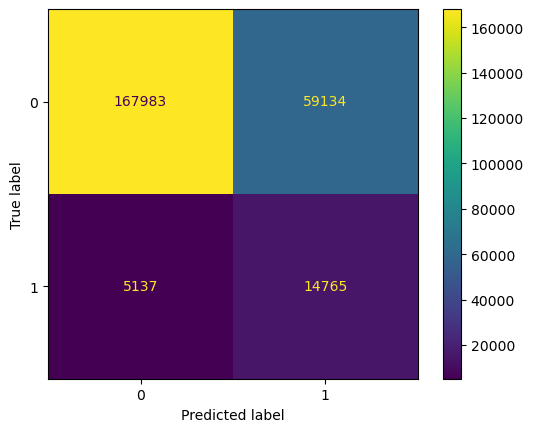

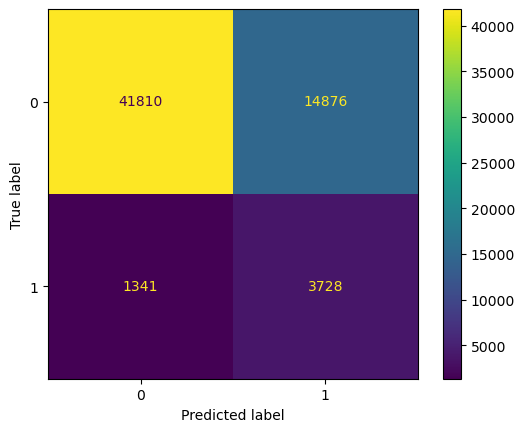

In [51]:
# Confusion Matrix - Train Set
cm_rf_train = confusion_matrix(y_train_num, y_pred_train)
ConfusionMatrixDisplay(cm_rf_train).plot()

# Confusion Matrix - Test Set
cm_rf_test = confusion_matrix(y_test_num, y_pred_test)
ConfusionMatrixDisplay(cm_rf_test).plot()

***Sebelum dilakukan Hyperparameter Tuning***

Informasi :
- Data merupakan data imbalance
- Class positive = 1 (Yes), karena analisis difokuskan pada pasien yang berisiko memiliki penyakit jantung.
Risiko utama adalah False Negative (FN), yaitu ketika model memprediksi pasien tidak memiliki penyakit jantung, padahal sebenarnya memiliki penyakit jantung. Hal ini berpotensi menyebabkan pasien tidak mendapatkan perawatan atau pemeriksaan lebih lanjut, sehingga dapat mengakibatkan peningkatan risiko kesehatan atau komplikasi serius.

Kesimpulan :   
Dari informasi diatas, metric yang digunakan adalah **Recall pada class positive (1)**.  
Nilai yang didapatkan pada train set dan test set :
- Train-set : 0.74
- Test-set  : 0.74
- Jumlah FN pada Train dan Test : 5137 & 1341


### Setelah dilakukan Hyperparameter Tuning

In [52]:
# Fit di full training data
search_best.fit(X_train, y_train_num) # type: ignore

# Prediksi di train dan test set
y_pred_train_ht = search_best.predict(X_train) # type: ignore
y_pred_test_ht = search_best.predict(X_test) # type: ignore

# Evaluasi Random Forest sebelum Hyperparameter Tuning
print("Random Forest")
print("Train Set")
print("Classification Report:\n", classification_report(y_train_num, y_pred_train_ht))
print("")
print("Test Set")
print("Classification Report:\n", classification_report(y_test_num, y_pred_test_ht))


Random Forest
Train Set
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.73      0.83    227117
           1       0.20      0.75      0.31     19902

    accuracy                           0.73    247019
   macro avg       0.58      0.74      0.57    247019
weighted avg       0.91      0.73      0.79    247019


Test Set
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.73      0.83     56686
           1       0.20      0.74      0.31      5069

    accuracy                           0.73     61755
   macro avg       0.58      0.74      0.57     61755
weighted avg       0.91      0.73      0.79     61755



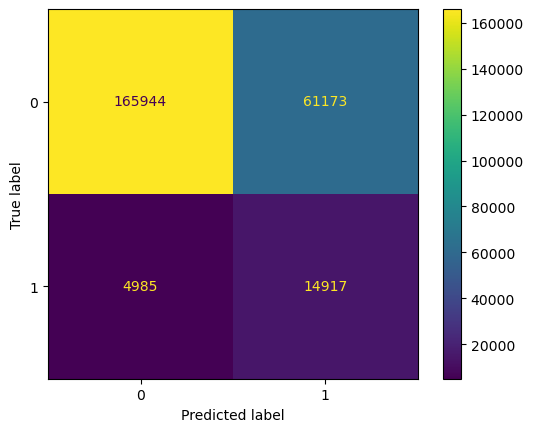

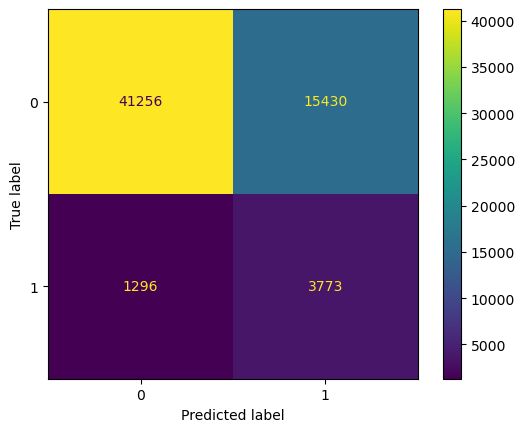

In [53]:
# Confusion Matrix - Train Set
cm_rf_train = confusion_matrix(y_train_num, y_pred_train_ht)
ConfusionMatrixDisplay(cm_rf_train).plot()

# Confusion Matrix - Test Set
cm_rf_test = confusion_matrix(y_test_num, y_pred_test_ht)
ConfusionMatrixDisplay(cm_rf_test).plot()

***Setelah dilakukan Hyperparameter Tuning***

Informasi :
- Data merupakan data imbalance
- Class positive = 1 (Yes), karena analisis difokuskan pada pasien yang berisiko memiliki penyakit jantung.
Risiko utama adalah False Negative (FN), yaitu ketika model memprediksi pasien tidak memiliki penyakit jantung, padahal sebenarnya memiliki penyakit jantung. Hal ini berpotensi menyebabkan pasien tidak mendapatkan perawatan atau pemeriksaan lebih lanjut, sehingga dapat mengakibatkan peningkatan risiko kesehatan atau komplikasi serius.

Kesimpulan :   
Dari informasi diatas, metric yang digunakan adalah **Recall pada class positive (1)**.  
Nilai yang didapatkan pada train set dan test set :
- Train-set : 0.75
- Test-set  : 0.74
- Jumlah FN pada Train dan Test : 4985 & 1296


### ***Kesimpulan*** :

Model Random Forest terbaik menggunakan hyperparameter:
- n_estimators : 444
- max_depth : 4
- min_samples_split : 13
- min_samples_leaf : 6
- max_features : 'log2'
- bootstrap : False
- class_weight : None 

Hasil ini sesuai dengan Hyperparameter Tuning karena recall pada train dan test lebih tinggi dan jumlah FN lebih sedikit, sehingga model lebih mampu menangkap kasus positif dengan akurat.

# **8 - Model Evaluation**

## Kategori Under Fit, Over Fit & Good Fit

Dari hasil sebelumnya, disimpulkan bahwa algoritma terbaik adalah Random Forest dengan hyperparamater terbaik yang merupakan hasil dari Hyperparameter Tuning.  
Dengan hasil berikut :  

In [54]:
# Fit di full training data
search_best.fit(X_train, y_train_num) # type: ignore

# Prediksi di train dan test set
y_pred_train_ht = search_best.predict(X_train) # type: ignore
y_pred_test_ht = search_best.predict(X_test) # type: ignore

# Evaluasi Random Forest sebelum Hyperparameter Tuning
print("Random Forest")
print("Train Set")
print("Classification Report:\n", classification_report(y_train_num, y_pred_train_ht))
print("")
print("Test Set")
print("Classification Report:\n", classification_report(y_test_num, y_pred_test_ht))


Exception ignored in: <function ResourceTracker.__del__ at 0x1079d1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105a65bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10706dbc0>
Traceback (most recent call last

Random Forest
Train Set
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.73      0.83    227117
           1       0.20      0.75      0.31     19902

    accuracy                           0.73    247019
   macro avg       0.58      0.74      0.57    247019
weighted avg       0.91      0.73      0.79    247019


Test Set
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.73      0.83     56686
           1       0.20      0.74      0.31      5069

    accuracy                           0.73     61755
   macro avg       0.58      0.74      0.57     61755
weighted avg       0.91      0.73      0.79     61755



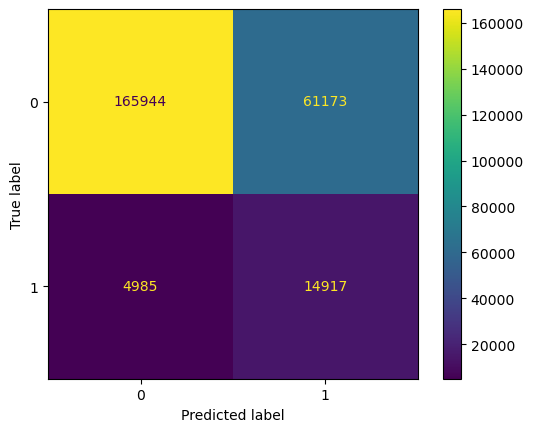

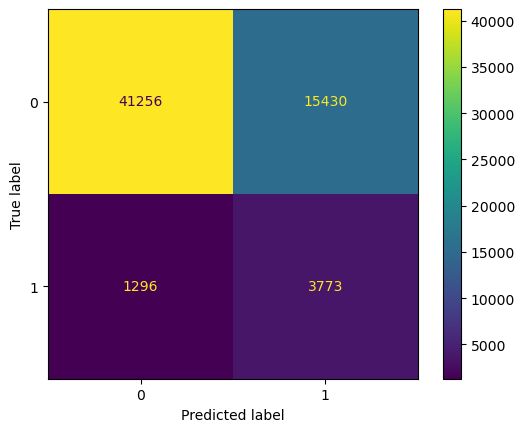

In [55]:
# Confusion Matrix - Train Set
cm_rf_train = confusion_matrix(y_train_num, y_pred_train_ht)
ConfusionMatrixDisplay(cm_rf_train).plot()

# Confusion Matrix - Test Set
cm_rf_test = confusion_matrix(y_test_num, y_pred_test_ht)
ConfusionMatrixDisplay(cm_rf_test).plot()

### ***Kesimpulan :***
- Recall pada train = 0.75 dan test = 0.74 yang artinya model mampu menangkap sebagian besar kasus positif baik di data pelatihan maupun pengujian, menunjukkan konsistensi performa.

- FN pada train = 4,985 dan test = 1,296 yang artinya jumlah kasus positif yang terlewat relatif rendah, sehingga model minim risiko melewatkan kasus penting.

- Model termasuk dalam kategori `Good Fit` karena model dapat memprediksi pada train dan test set dengan baik.

## Kelebihan dan Kelemahan Model

### Kelebihan Model

- Recall pada Class Positive (1) cukup tinggi, dengan nilai Train = 0.75 dan Test = 0.74. Yang artinya model mampu menangkap sebagian besar kasus positif dan FN relatif rendah. Hal ini sesuai dengan tujuan proyek yaitu mengurangi resiko kesalahan prediksi pada FN (orang yang memiliki kemungkinan mengalami penyakit jantung namun di diagnosa tidak ada kemungkinan)

- Nilai train dan test tergolong stabil dan masuk kategori `Good Fit`.


### Kelemahan Model

- Nilai precision pada class positive (1) masih rendah yaitu 0.20 yang artinya banyak prediksi positif yang salah (False Positive). Jadi, masih diperlukan optimasi agar lebih efisien dan hasil yang didapat lebih akurat.

## Model Improvement

Performa model dapat dilakukan improvement selanjutnya dengan beberapa langkah berikut :  

a. Threshold Tuning
- Menaikkan ambang prediksi positif supaya false positive berkurang, tapi recall tetap tinggi.

b. Feature Engineering
- Mengecek kembali fitur, hapus yang tidak relevan atau noise, tambahkan fitur penting agar model lebih efisien.

c. Feature Selection
- Selain feature engineering, bisa dipilih fitur paling penting untuk mengurangi noise dan mempercepat training.

d. Alternatif Model / Ensemble
- Mencoba model lain yang memungkinkan untuk mendapatkan hasil yang lebih baik

# **9 - Model Saving**

In [56]:
# Menyimpan model terbaik
best_model = search_best

with open('best_model.pkl','wb') as model_file:
  pickle.dump(best_model, model_file)

# **10 - Model Inference**

*Bagian ini dilakukan pada notebook terpisah dengan judul P1M2_ade_widya_inf.ipynb*

# **11 - Kesimpulan**

## (1) Insight dari EDA

Berdasarkan analisa faktor resiko penyakit jantung :

a. Olahraga  
- Orang yang berolahraga memiliki risiko penyakit jantung lebih rendah dibanding yang tidak, menunjukkan aktivitas fisik menurunkan risiko.

b. Riwayat Skin Cancer  
- Terdapat kemungkinan hubungan positif dengan penyakit jantung, meski efeknya relatif kecil.

c. Depresi  
- Tidak signifikan meningkatkan risiko penyakit jantung, hanya sedikit lebih tinggi dibanding yang tidak depresi.

d. Diabetes   
- Salah satu faktor risiko utama; orang dengan diabetes memiliki kemungkinan penyakit jantung tertinggi, pre-diabetes sedikit lebih rendah, dan ibu hamil dengan diabetes risiko paling rendah.

e. Jenis Kelamin  
- Pria memiliki risiko penyakit jantung lebih tinggi dibanding wanita.

f. Usia   
- Risiko meningkat seiring bertambahnya usia, tertinggi pada usia 80+ dan terendah pada usia 18-24.

g. Merokok  
- Faktor risiko kuat; perokok memiliki kemungkinan penyakit jantung jauh lebih tinggi dibanding bukan perokok.

Kesimpulan Utama:
Faktor risiko utama penyakit jantung di dataset ini adalah diabetes, usia lanjut, merokok, dan jenis kelamin laki-laki, sementara olahraga memiliki efek protektif. Faktor lain seperti depresi atau riwayat kanker kulit menunjukkan efek lebih kecil atau tidak signifikan.


## (2) Performa Model
- Model Random Forest mampu menangkap sebagian besar kasus penyakit jantung (recall train 0.75, test 0.74) sehingga risiko melewatkan pasien berisiko tinggi kecil. 
- Precision kelas positif rendah (0.20), jadi ada cukup banyak prediksi positif palsu, tapi masih bisa diterima karena melewatkan pasien berisiko lebih berbahaya. 
- Train dan test metrics mirip, menunjukkan model stabil dan tidak overfit.


## (3) Rekomendasi Model
Model Random Forest bisa mendeteksi pasien dengan risiko penyakit jantung tinggi, terutama yang memiliki faktor risiko seperti obesitas, diabetes, merokok, dan usia lanjut. Prediksi positif memang ada beberapa palsu, tapi masih aman untuk screening awal karena mengurangi risiko melewatkan pasien berisiko tinggi. Data baru harus melewati pipeline preprocessing yang sama agar hasil akurat, dan performa model perlu dipantau serta diupdate secara berkala jika kondisi pasien berubah.

## ***Kesimpulan Akhir :***
Model ini dibangun berhasil memprediksi kemungkinan seseorang memiliki penyakit jantung dengan baik, terutama menangkap pasien berisiko tinggi (recall 0.75), meskipun ada beberapa prediksi positif palsu. Analisis EDA dan fitur menunjukkan bahwa faktor risiko utama adalah diabetes, usia lanjut, merokok, dan jenis kelamin laki-laki, sementara olahraga memiliki efek protektif. Model ini dapat digunakan untuk memberikan insight bagi individu berisiko tinggi dan mendukung upaya pencegahan penyakit jantung melalui identifikasi dan intervensi dini.